In [2]:
#TOPLAM 12 KOMBİNASYON DENENDİ.

#İLK 5 KOMBİNASYONU IoU BENZERLİK METRİĞİYLE lABELE BENZERLİK AÇISINDAN SKORLANDI (FARKLI YAKLAŞIM)
#SON 7 KOMBİNASYON BRISQUE'İN ALTERNATİFİ OLAN SHANNON ENTROPİSİYLE SKORLANDI 


In [3]:
#EN BAŞARILI ÖN İŞLEME KOMBİNASYONUMUZ;
#Pipeline6: L1 Norm + Mean + Parlaklık(20) + Keskinleştirme: Shanon Entropy = 5.9376 OLMUŞTUR

#Shannon entropisi, görselin karmaşıklığını veya içerdiği bilginin miktarını anlamamıza yardımcı olur.
#Düşük Entropi: Görüntüdeki piksellerin çoğu benzer değere sahip, yani daha homojen bir görüntü (örneğin, tek renkli bir alan).
#Yüksek Entropi: Görüntüdeki pikseller rastgele ve çeşitlidir, bu da daha karmaşık ve detaylı bir görüntüye işaret eder.

In [4]:
#Pipeline1: L1 Norm + Median + Histogram Eşitleme: Entropy = 5.6044
#Pipeline2: L1 Norm + Median + Parlaklık(20): Entropy = 5.8738
#Pipeline3: L1 Norm + Median + Zıtlık: Entropy = 5.2499
#Pipeline4: L2 Norm + AdaptifMedian + Parlaklık(50): Entropy = 5.8738
#Pipeline5: L1 Norm + Mean + Parlaklık(20): Entropy = 5.8738
#Pipeline6: L1 Norm + Mean + Parlaklık(20) + Keskinleştirme: Entropy = 5.9376
#Pipeline7: L1 Norm + Keskinleştirme + Mean + Parlaklık(20): Entropy = 5.9376

#Shannon Entropisine göre En İyi Pipeline: Pipeline6: L1 Norm + Mean + Parlaklık(20) + Keskinleştirme
#Entropi Değeri: 5.9376

In [50]:
#İLK 5 KOMBİNASYON(IoU)

In [1]:
#Pipeline1: MinMaxNorm + Median + Sobel + Gamma

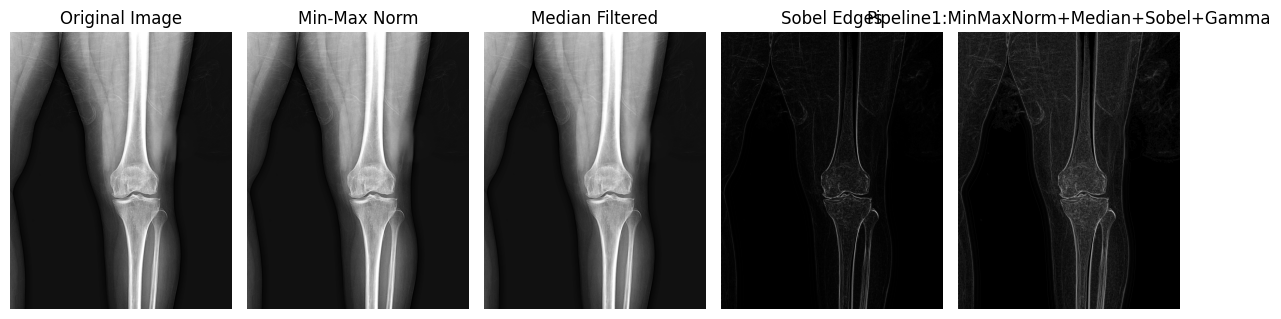

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü yükle
image_path = r"C:\Users\wdewe\OneDrive\Desktop\images\image (1).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Min-Max Normalizasyon
def min_max_normalization(image):
    norm_image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
    return norm_image.astype(np.uint8)

image_minmax = min_max_normalization(image)

# Median Filtreleme
image_median = cv2.medianBlur(image_minmax, 5)  # 5x5 kernel boyutu

# Sobel Kenar Algılama
sobel_x = cv2.Sobel(image_median, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_median, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))

# Gamma Düzeltme
gamma = 1.5  # Gamma değeri
gamma_corrected = np.array(255 * (sobel_combined / 255) ** (1 / gamma), dtype=np.uint8)

# Sonuçları görselleştirme
plt.figure(figsize=(12, 8))

# Orijinal Görüntü
plt.subplot(1, 5, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Min-Max Normalizasyon
plt.subplot(1, 5, 2)
plt.imshow(image_minmax, cmap='gray')
plt.title("Min-Max Norm")
plt.axis('off')

# Median Filtreleme
plt.subplot(1, 5, 3)
plt.imshow(image_median, cmap='gray')
plt.title("Median Filtered")
plt.axis('off')

# Sobel Kenar Algılama
plt.subplot(1, 5, 4)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Edges")
plt.axis('off')

# Gamma Düzeltme
plt.subplot(1, 5, 5)
plt.imshow(gamma_corrected, cmap='gray')
plt.title("Pipeline1:MinMaxNorm+Median+Sobel+Gamma")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Pipeline2:Sobel + Zıtlık

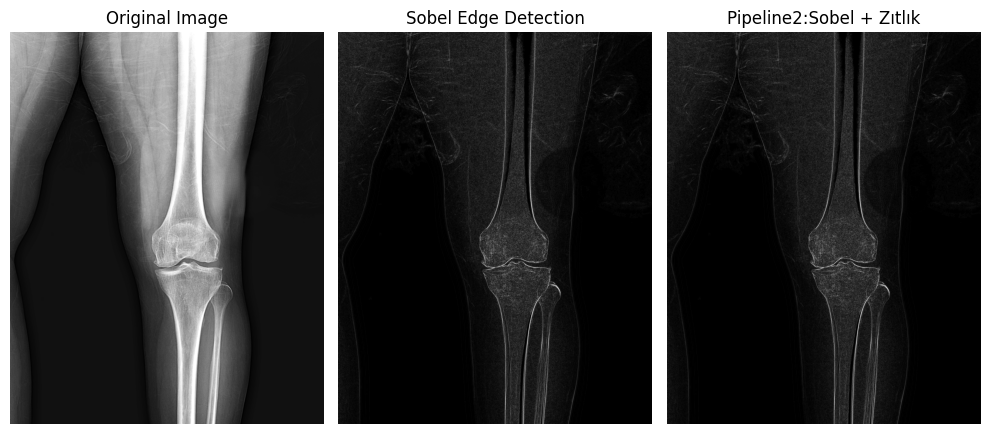

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü yükle
image_path = r"C:\Users\wdewe\OneDrive\Desktop\images\image (1).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Sobel Kenar Algılama
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))

# Zıtlık Artırma (Contrast Stretching)
min_val = np.min(sobel_combined)
max_val = np.max(sobel_combined)
contrast_stretched = ((sobel_combined - min_val) / (max_val - min_val) * 255).astype(np.uint8)

# Sonuçları görselleştirme
plt.figure(figsize=(10, 7))

# Orijinal Görüntü
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Sobel Kenar Algılama
plt.subplot(1, 3, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

# Zıtlık Artırılmış Görüntü
plt.subplot(1, 3, 3)
plt.imshow(contrast_stretched, cmap='gray')
plt.title("Pipeline2:Sobel + Zıtlık")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Pipeline3:Sobel + Zıtlık + Gamma

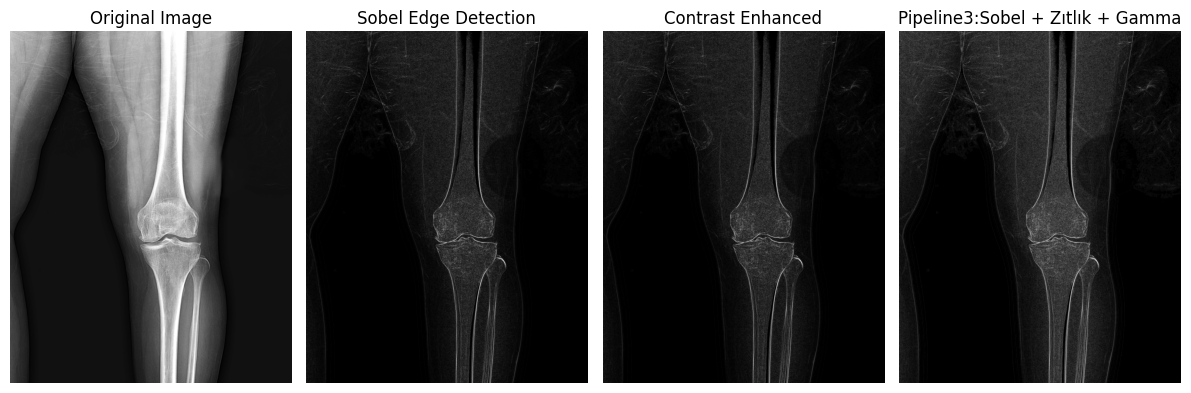

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü yükle
image_path = r"C:\Users\wdewe\OneDrive\Desktop\images\image (1).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Sobel Kenar Algılama
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))

# Zıtlık Artırma (Contrast Stretching)
min_val = np.min(sobel_combined)
max_val = np.max(sobel_combined)
contrast_stretched = ((sobel_combined - min_val) / (max_val - min_val) * 255).astype(np.uint8)

# Gamma Dönüşümü
def apply_gamma(image, gamma):
    gamma_corrected = np.power(image / 255.0, gamma) * 255
    return gamma_corrected.astype(np.uint8)

gamma_value = 0.8  # Gamma değeri (isteğe göre değiştirilebilir)
gamma_corrected = apply_gamma(contrast_stretched, gamma_value)

# Sonuçları görselleştirme
plt.figure(figsize=(12, 8))

# Orijinal Görüntü
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Sobel Kenar Algılama
plt.subplot(1, 4, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

# Zıtlık Artırma
plt.subplot(1, 4, 3)
plt.imshow(contrast_stretched, cmap='gray')
plt.title("Contrast Enhanced")
plt.axis('off')

# Gamma Düzeltme
plt.subplot(1, 4, 4)
plt.imshow(gamma_corrected, cmap='gray')
plt.title("Pipeline3:Sobel + Zıtlık + Gamma")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Pipeline4:Gamma + Sobel + White Edge

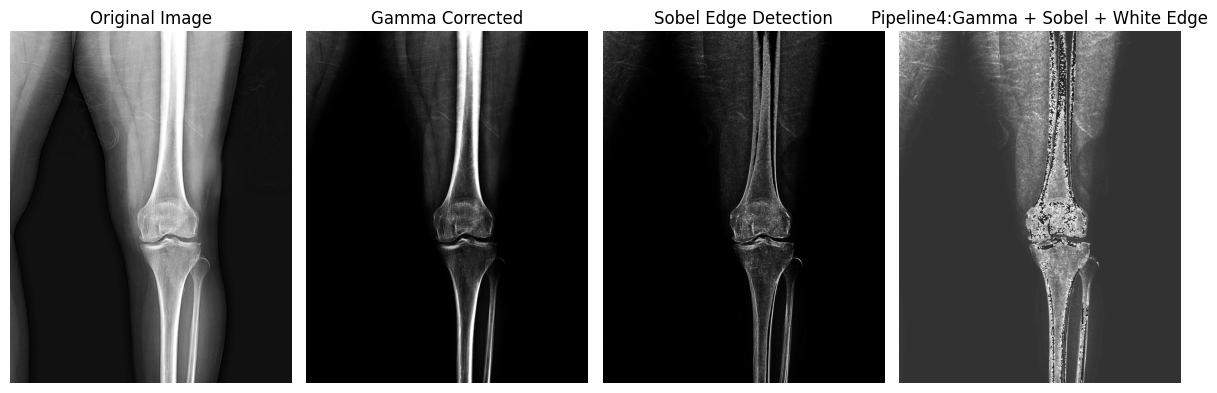

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü yükle
image_path = r"C:\Users\wdewe\OneDrive\Desktop\images\image (1).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Gamma Dönüşümü
def apply_gamma(image, gamma):
    gamma_corrected = np.power(image / 255.0, gamma) * 255
    return gamma_corrected.astype(np.uint8)

gamma_value = 4  # Gamma değeri (isteğe göre değiştirilebilir)
gamma_corrected = apply_gamma(image, gamma_value)

# Sobel Kenar Algılama
sobel_x = cv2.Sobel(gamma_corrected, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gamma_corrected, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))

# Çizgilerin İçini Beyaza Boyama (Morfolojik İşlem)
# Kenarları kalınlaştırma
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilated_edges = cv2.dilate(sobel_combined, kernel, iterations=1)

# Çizgilerin içini doldurma
filled_image = cv2.morphologyEx(dilated_edges, cv2.MORPH_CLOSE, kernel)

# Beyazlığı artırmak için parlaklık ekleme
brightened_image = np.clip(filled_image + 50, 0, 255).astype(np.uint8)

# Sonuçları görselleştirme
plt.figure(figsize=(12, 8))

# Orijinal Görüntü
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Gamma Düzeltme
plt.subplot(1, 4, 2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title("Gamma Corrected")
plt.axis('off')

# Sobel Kenar Algılama
plt.subplot(1, 4, 3)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

# Beyazlığı Artırılmış Çizgilerin İçini Beyaza Boyama
plt.subplot(1, 4, 4)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline4:Gamma + Sobel + White Edge")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Pipeline5:Gamma + Sobel + White Edge + Kontur + Poligon

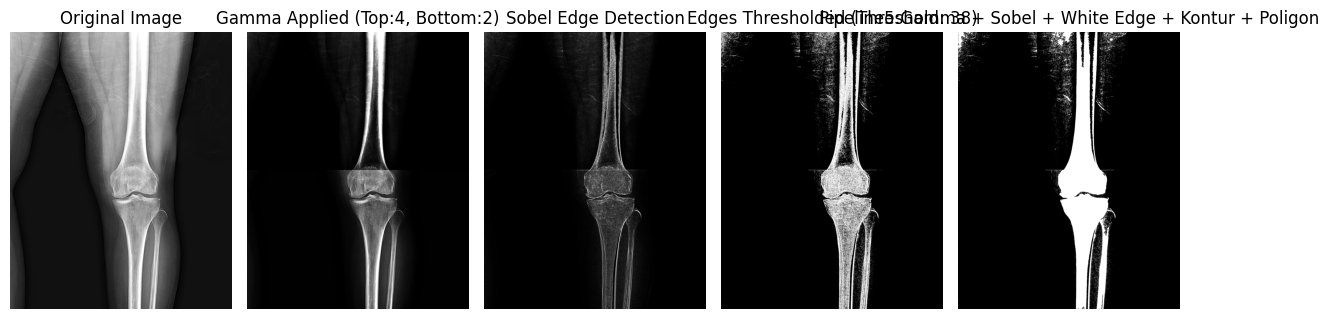

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# İşlem Kombinasyonu:
# 1. Orijinal Görüntüyü Yükleme
# 2. Görüntüye Gamma Dönüşümü Uygulama (Üst Kısma Gamma=4, Alt Kısma Gamma=2)
# 3. Sobel Kenar Algılama Uygulama
# 4. Sobel Kenarlarını Eşikleme (Thresholding) ile Siyah-Beyaz Görüntü Elde Etme
# 5. Kenarların Konturlarını Bulma
# 6. Konturları Beyaz Yapacak Şekilde Poligon Doldurma
# 7. Poligon İçindeki Alanları Beyaz Yapma

# Görüntüyü yükle
image_path = r"C:\Users\wdewe\OneDrive\Desktop\images\image (1).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Gamma Dönüşümü Fonksiyonu
def apply_gamma(image, gamma):
    gamma_corrected = np.power(image / 255.0, gamma) * 255
    return gamma_corrected.astype(np.uint8)

# Görüntüyü üst ve alt olarak iki bölüme ayır
height, width = image.shape
mid = height // 2

# Üst kısmına gamma=4, alt kısmına gamma=2 uygula
image_upper = apply_gamma(image[:mid, :], gamma=6.5)
image_lower = apply_gamma(image[mid:, :], gamma=2)

# İki kısmı birleştir
gamma_combined = np.vstack((image_upper, image_lower))

# Sobel Kenar Algılama
sobel_x = cv2.Sobel(gamma_combined, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gamma_combined, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))

# Sobel kenarlarını eşikle, belirli bir yoğunluğun altındaki kenarları sıfırlamak için threshold uygulayalım
threshold_value = 38  # Eşik değeri (isteğe bağlı olarak değiştirilebilir)
_, binary_edges = cv2.threshold(sobel_combined, threshold_value, 255, cv2.THRESH_BINARY)

# Konturları bul ve poligon içine al
contours, _ = cv2.findContours(binary_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Beyaz alanı içine alan poligonları çiz ve bu alanları beyaz yap
polygon_image = np.zeros_like(binary_edges)

for contour in contours:
    # Konturların içini beyaz yap (poligon şekli)
    cv2.fillPoly(polygon_image, [contour], 255)

# Poligon içindeki alanları beyaz yap
final_image = cv2.bitwise_or(binary_edges, polygon_image)

# Sonuçları görselleştirme
plt.figure(figsize=(12, 8))

# Orijinal Görüntü
plt.subplot(1, 5, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Gamma Uygulandıktan Sonra
plt.subplot(1, 5, 2)
plt.imshow(gamma_combined, cmap='gray')
plt.title("Gamma Applied (Top:4, Bottom:2)")
plt.axis('off')

# Sobel Kenar Algılama
plt.subplot(1, 5, 3)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

# Eşiklenmiş Kenarlar (Beyaz ve Siyah)
plt.subplot(1, 5, 4)
plt.imshow(binary_edges, cmap='gray')
plt.title(f"Edges Thresholded (Threshold: {threshold_value})")
plt.axis('off')

# Poligon İçinde Beyaz Alanlar
plt.subplot(1, 5, 5)
plt.imshow(final_image, cmap='gray')
plt.title("Pipeline5:Gamma + Sobel + White Edge + Kontur + Poligon")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#GÖRSELLEŞTİRME

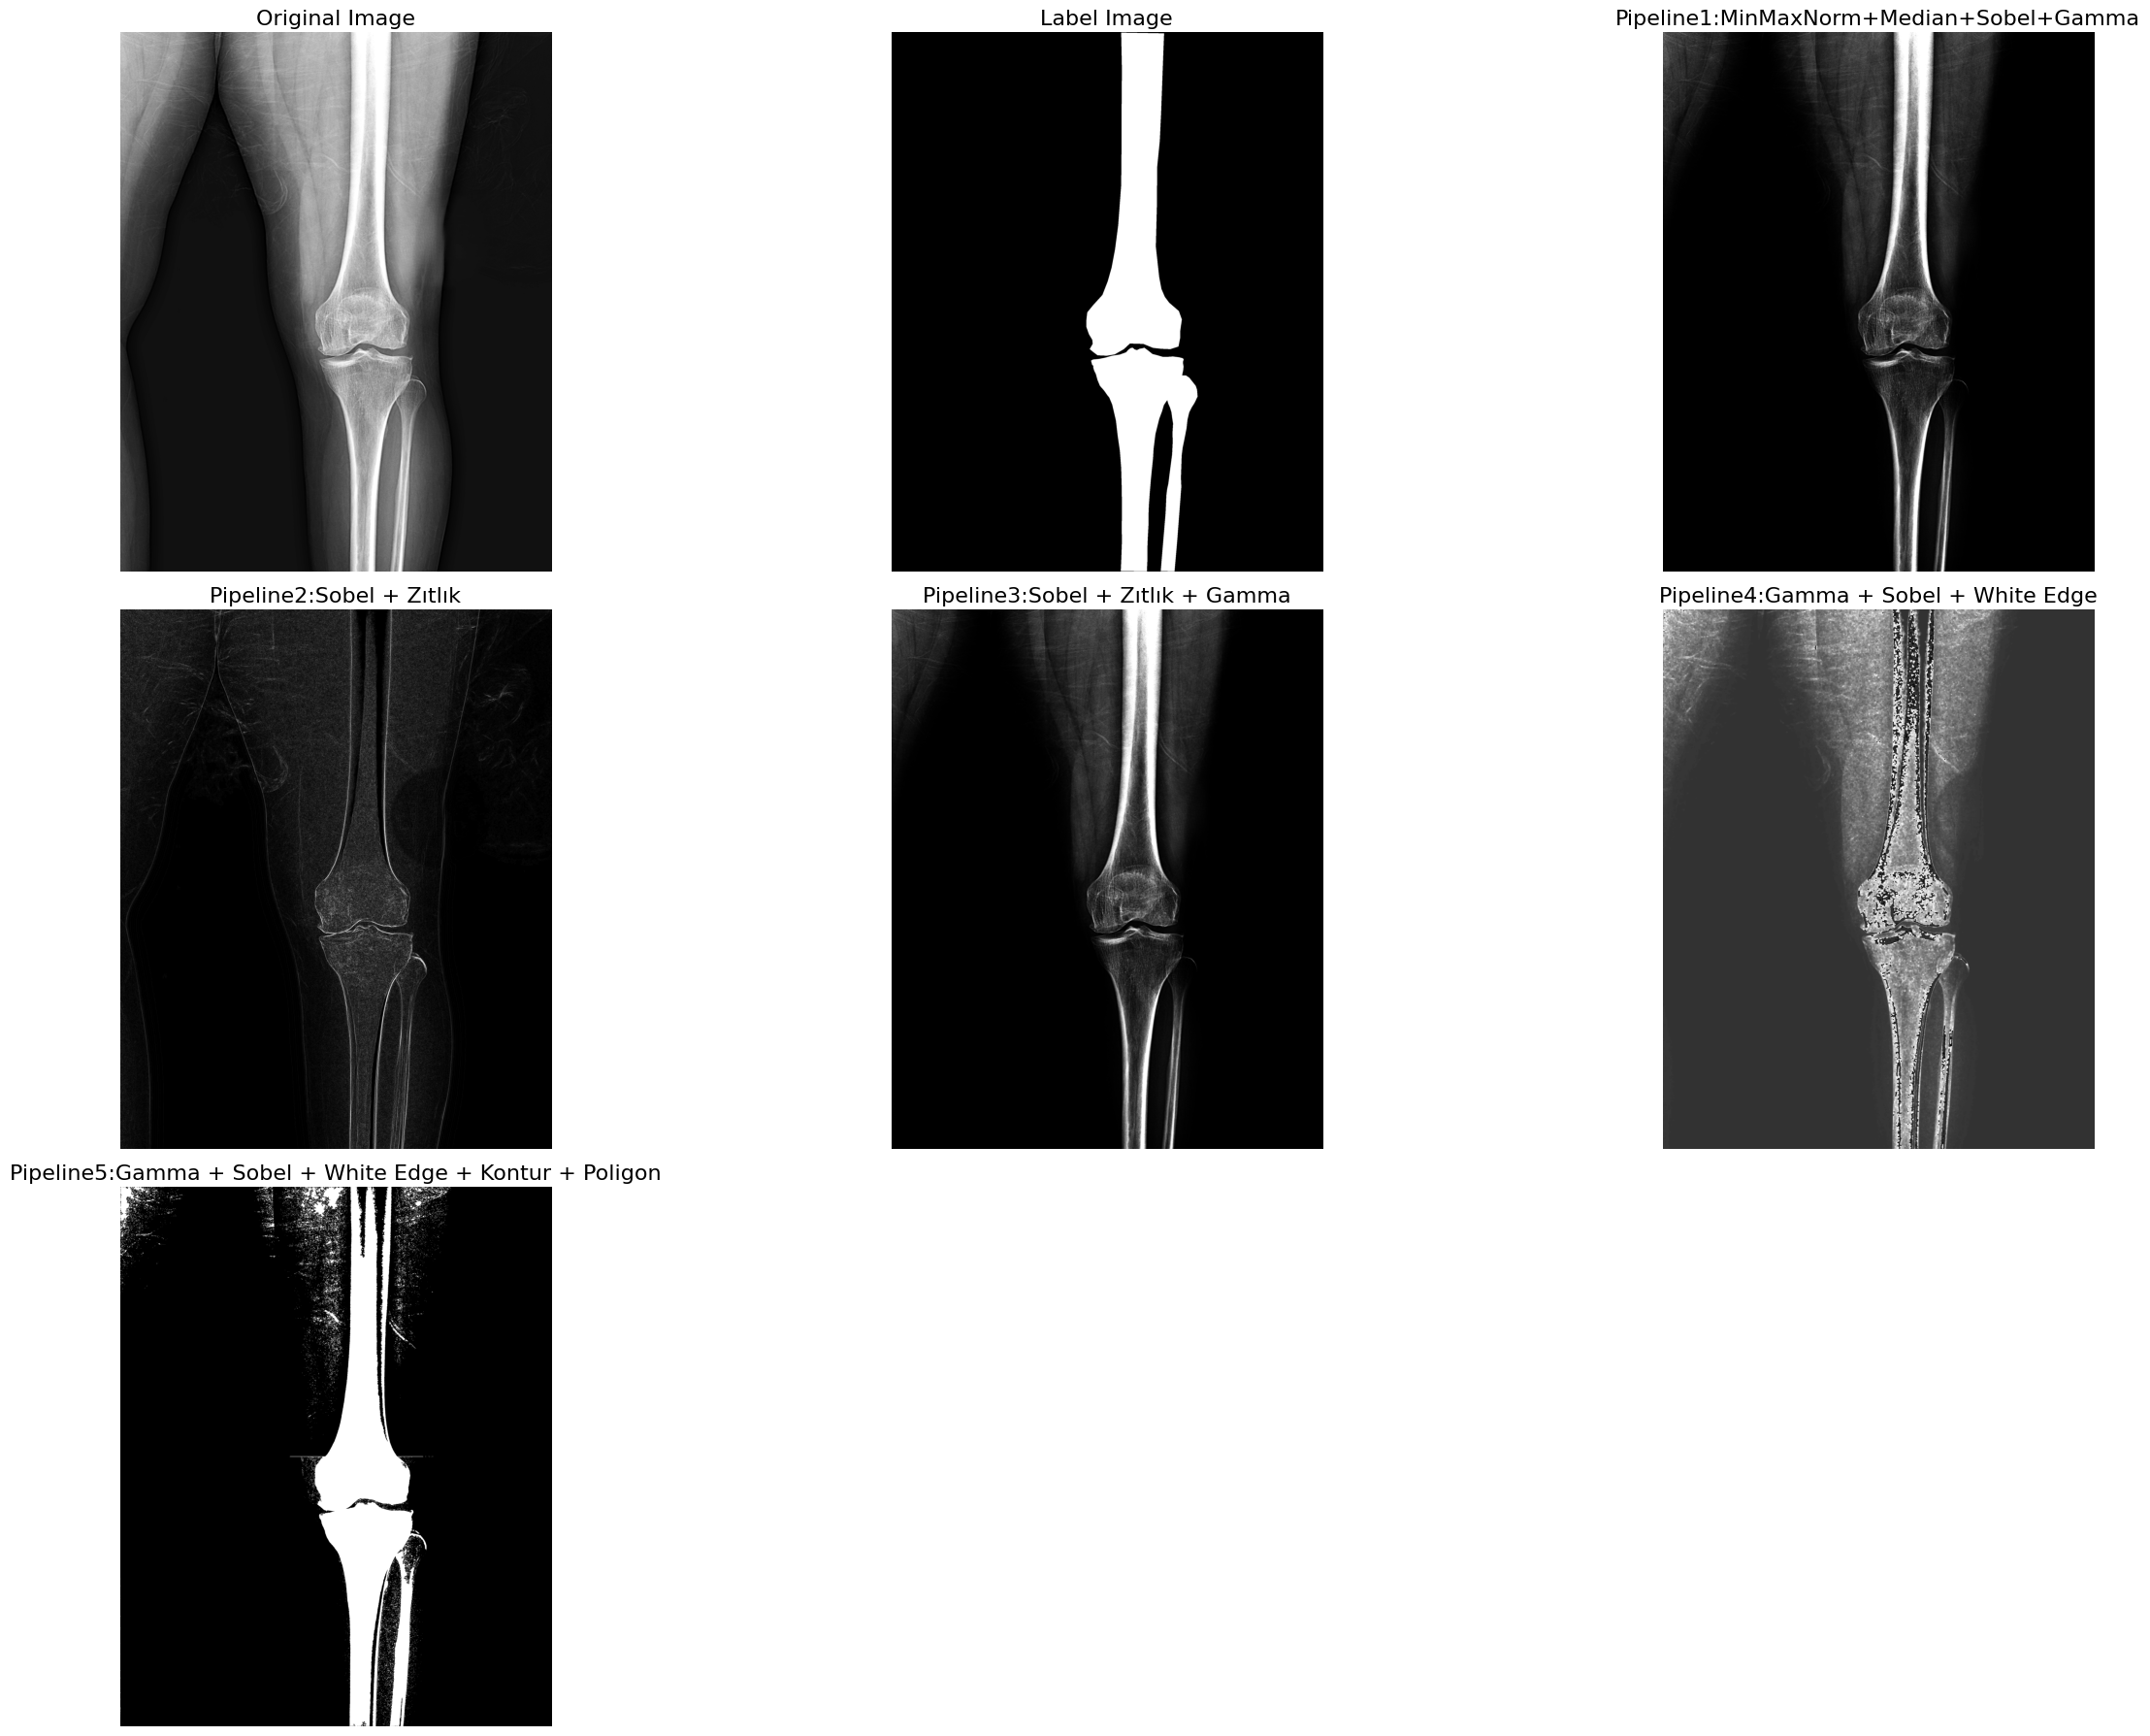

In [6]:
import cv2
import matplotlib.pyplot as plt

# Orijinal görüntü
image_path = r"C:\Users\wdewe\OneDrive\Desktop\images\image (1).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Label görüntüsü
label_path = r"C:\Users\wdewe\OneDrive\Desktop\Labels\label (1).png"
label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)

# Sonuçları görselleştirme
plt.figure(figsize=(24, 18))  # Figür boyutunu büyütüyoruz

# Orijinal Görüntü
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image", fontsize=16)  # Daha büyük başlık fontu
plt.axis('off')

# Label Görüntü
plt.subplot(3, 3, 2)
plt.imshow(label, cmap='gray')
plt.title("Label Image", fontsize=16)
plt.axis('off')

# Pipeline1
plt.subplot(3, 3, 3)
plt.imshow(gamma_corrected, cmap='gray')
plt.title("Pipeline1:MinMaxNorm+Median+Sobel+Gamma", fontsize=16)
plt.axis('off')

# Pipeline2
plt.subplot(3, 3, 4)
plt.imshow(contrast_stretched, cmap='gray')
plt.title("Pipeline2:Sobel + Zıtlık", fontsize=16)
plt.axis('off')

# Pipeline3
plt.subplot(3, 3, 5)
plt.imshow(gamma_corrected, cmap='gray')
plt.title("Pipeline3:Sobel + Zıtlık + Gamma", fontsize=16)
plt.axis('off')

# Pipeline4
plt.subplot(3, 3, 6)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline4:Gamma + Sobel + White Edge", fontsize=16)
plt.axis('off')

# Pipeline5
plt.subplot(3, 3, 7)
plt.imshow(final_image, cmap='gray')
plt.title("Pipeline5:Gamma + Sobel + White Edge + Kontur + Poligon", fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


In [47]:
#IoU değerine göre Skorlama

In [9]:
import cv2
import numpy as np

# Fonksiyon: IoU Hesaplama
def calculate_iou(label, prediction):
    # Kesişim ve birleşim alanlarını hesapla
    intersection = np.logical_and(label, prediction).sum()
    union = np.logical_or(label, prediction).sum()
    # IoU değeri hesapla
    iou = intersection / union if union > 0 else 0
    return iou

# Orijinal ve etiket görüntüleri yükleme
label_path = r"C:\Users\wdewe\OneDrive\Desktop\Labels\label (1).png"
label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
label = label > 0  # İkili maske (binary mask) oluşturma

# Pipeline görüntülerini yükleme/oluşturma (örnek)
# Burada pipeline sonuçlarını önceden hesaplamış olduğunuzu varsayıyorum
pipeline1 = gamma_corrected > 0  # İkili maske
pipeline2 = contrast_stretched > 0  # İkili maske
pipeline3 = gamma_corrected > 0  # İkili maske
pipeline4 = brightened_image > 0  # İkili maske
pipeline5 = final_image > 0  # İkili maske

# IoU değerlerini hesapla
iou_scores = {
    "Pipeline1": calculate_iou(label, pipeline1),
    "Pipeline2": calculate_iou(label, pipeline2),
    "Pipeline3": calculate_iou(label, pipeline3),
    "Pipeline4": calculate_iou(label, pipeline4),
    "Pipeline5": calculate_iou(label, pipeline5)
}

# En iyi pipeline'ı bul
best_pipeline = max(iou_scores, key=iou_scores.get)
best_iou = iou_scores[best_pipeline]

# Sonuçları yazdır
for pipeline, iou in iou_scores.items():
    print(f"{pipeline} IoU: {iou:.4f}")

print(f"\nEn iyi pipeline: {best_pipeline} (IoU: {best_iou:.4f})")


Pipeline1 IoU: 0.3127
Pipeline2 IoU: 0.1716
Pipeline3 IoU: 0.3127
Pipeline4 IoU: 0.1174
Pipeline5 IoU: 0.7708

En iyi pipeline: Pipeline5 (IoU: 0.7708)


In [51]:
#SON 7 KOMBİNASYON (SHANNON)

In [ ]:
#Pipeline1: L1 Norm + Median + Histogram Eşitleme

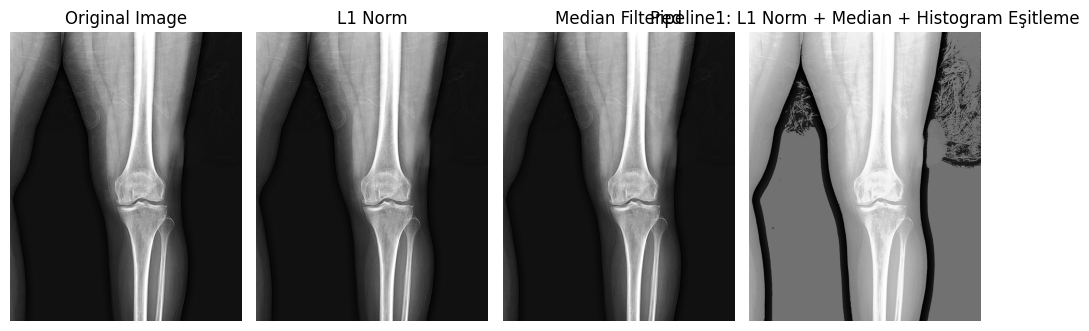

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü yükle
image_path = r"C:\Users\wdewe\OneDrive\Desktop\images\image (1).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# L1 Norm (veya başka bir normalizasyon yöntemi, burada örnek olarak L2 normu kullanılıyor)
image_l1norm = np.abs(image)  # L1 norm için negatif değerleri kaldırabiliriz, burada basitçe mutlak değeri aldık

# Median Filtreleme
image_median = cv2.medianBlur(image_l1norm, 5)  # 5x5 kernel boyutu ile median filtreleme

# Histogram Eşitleme
image_hist_eq = cv2.equalizeHist(image_median)

# Sonuçları göster
plt.figure(figsize=(10, 7))

# Orijinal Görüntü
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# L1 Norm Uygulanmış Görüntü
plt.subplot(1, 4, 2)
plt.imshow(image_l1norm, cmap='gray')
plt.title("L1 Norm")
plt.axis('off')

# Median Filtreli Görüntü
plt.subplot(1, 4, 3)
plt.imshow(image_median, cmap='gray')
plt.title("Median Filtered")
plt.axis('off')

# Histogram Eşitlenmiş Görüntü
plt.subplot(1, 4, 4)
plt.imshow(image_hist_eq, cmap='gray')
plt.title("Pipeline1: L1 Norm + Median + Histogram Eşitleme")
plt.axis('off')

plt.tight_layout()
plt.show()


In [52]:
#Pipeline2: L1 Norm + Median + Parlaklık(20)

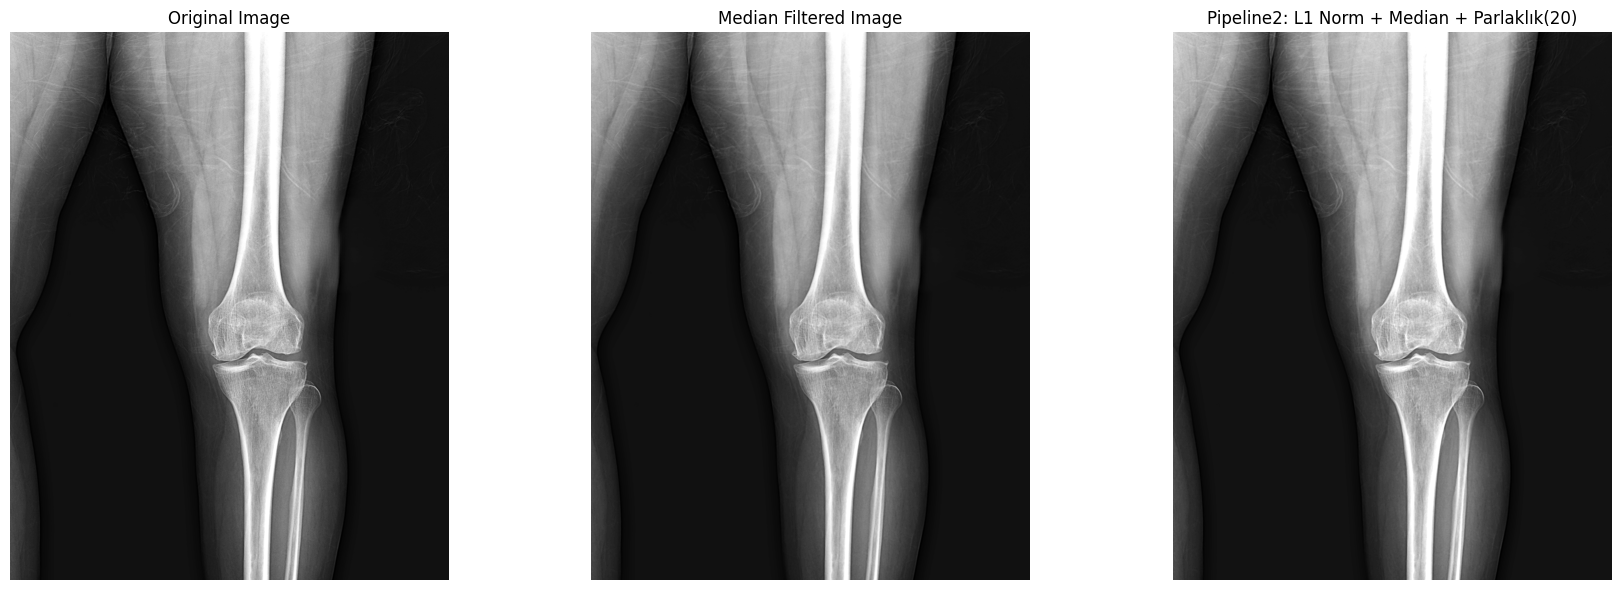

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Orijinal görüntüyü yükleme
image_path = r"C:\Users\wdewe\OneDrive\Desktop\images\image (1).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Adım 1: I1 Norm Normalizasyonu
normalized_image = image / 255.0  # Piksel değerlerini [0, 1] aralığına getir

# Adım 2: Median Filtreleme
median_filtered = cv2.medianBlur((normalized_image * 255).astype(np.uint8), ksize=5)  # Median filtre uygula

# Adım 3: Parlaklık Artırma
brightness_increase = 20  # Parlaklık artış miktarı
brightened_image = cv2.add(median_filtered, np.full_like(median_filtered, brightness_increase, dtype=np.uint8))

# Görüntüleri görselleştirme
plt.figure(figsize=(18, 6))

# Orijinal Görüntü
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Median Filtreli Görüntü
plt.subplot(1, 3, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtered Image")
plt.axis('off')

# Parlaklığı Artırılmış Görüntü
plt.subplot(1, 3, 3)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline2: L1 Norm + Median + Parlaklık(20)")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Pipeline3: L1 Norm + Median + Zıtlık

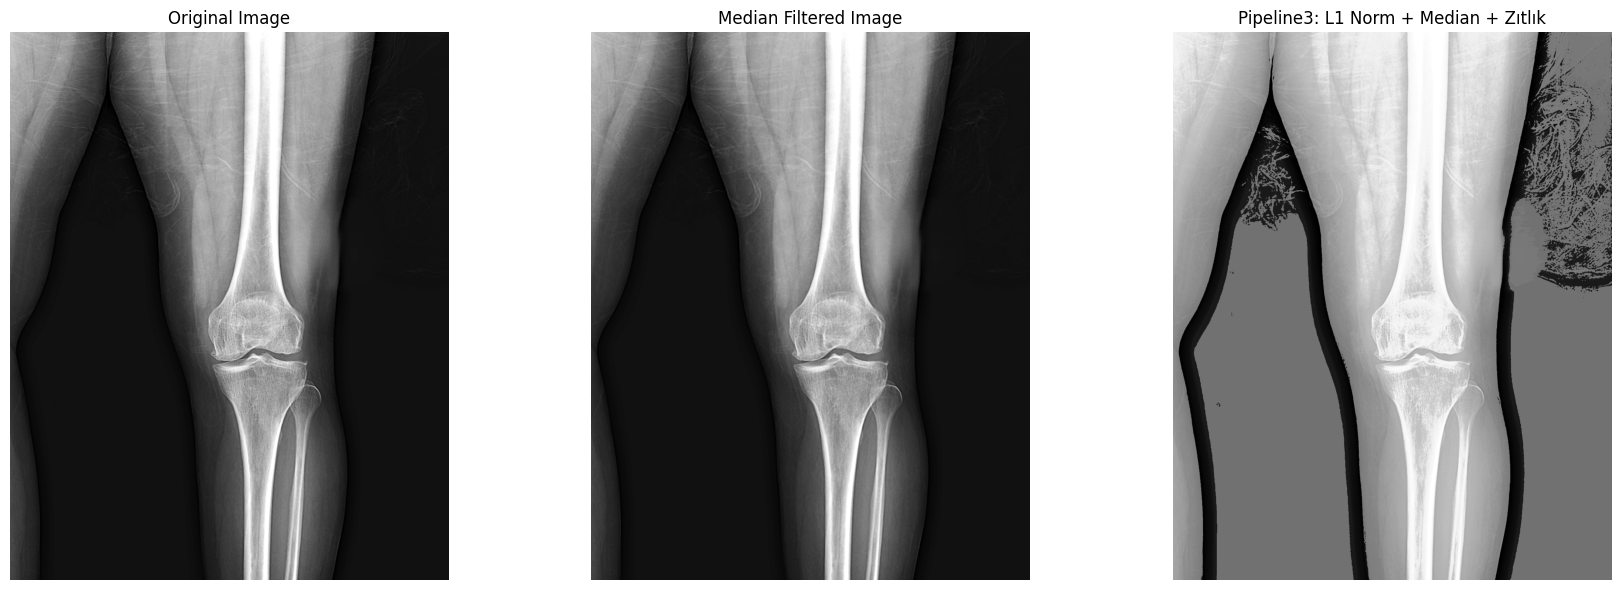

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Orijinal görüntüyü yükleme
image_path = r"C:\Users\wdewe\OneDrive\Desktop\images\image (1).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Adım 1: I1 Norm Normalizasyonu
normalized_image = image / 255.0  # Piksel değerlerini [0, 1] aralığına getir

# Adım 2: Median Filtreleme
median_filtered = cv2.medianBlur((normalized_image * 255).astype(np.uint8), ksize=5)  # Median filtre uygula

# Adım 3: Zıtlık Artırma (Histogram Eşitleme)
contrast_enhanced = cv2.equalizeHist(median_filtered)  # Histogram eşitlemesiyle zıtlık artırma

# Görüntüleri görselleştirme
plt.figure(figsize=(18, 6))

# Orijinal Görüntü
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Median Filtreli Görüntü
plt.subplot(1, 3, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtered Image")
plt.axis('off')

# Zıtlık Artırılmış Görüntü
plt.subplot(1, 3, 3)
plt.imshow(contrast_enhanced, cmap='gray')
plt.title("Pipeline3: L1 Norm + Median + Zıtlık")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Pipeline4: L2 Norm + AdaptifMedian + Parlaklık(50)

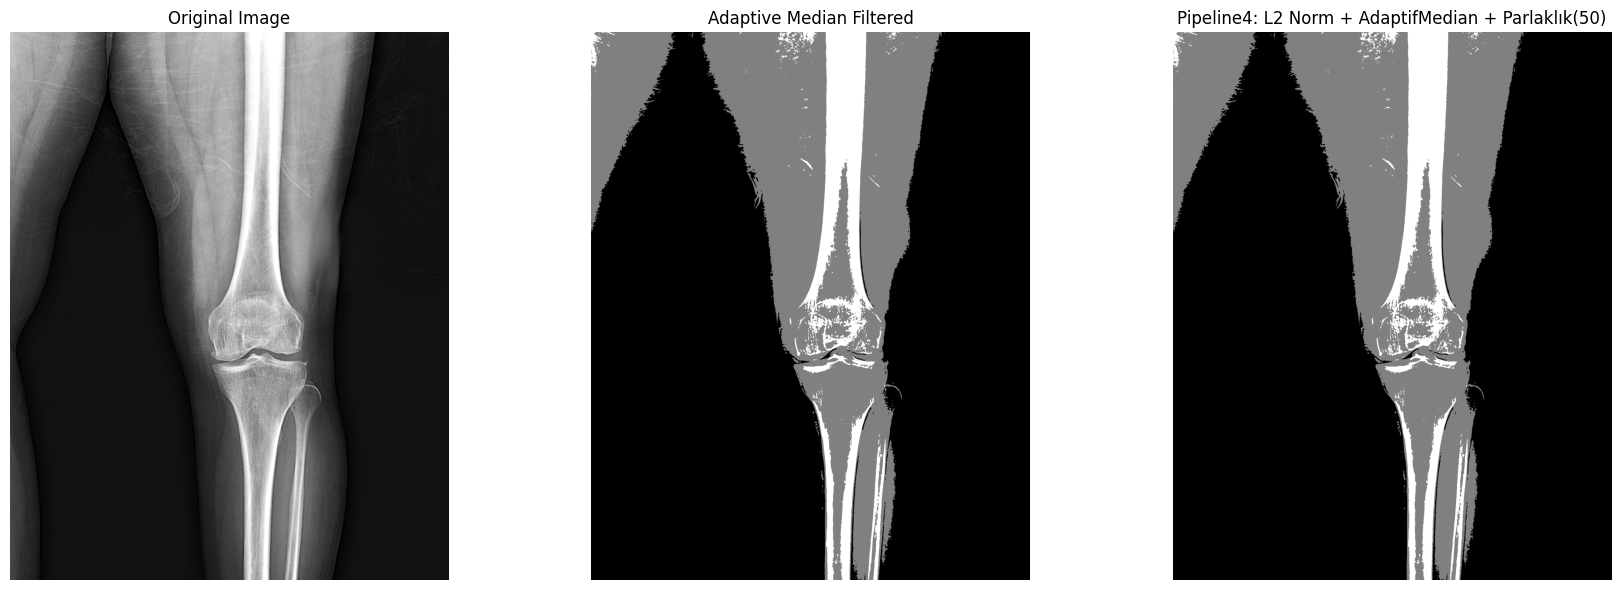

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Orijinal görüntüyü yükleme
image_path = r"C:\Users\wdewe\OneDrive\Desktop\images\image (1).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Adım 1: I2 Norm Normalizasyonu
def i2_norm(image):
    norm = np.sqrt(np.sum(image ** 2))  # I2 normunu hesapla (karelerin toplamının karekökü)
    normalized_image = image / norm if norm > 0 else image  # Normalize edilmiş görüntü
    return (normalized_image * 255).astype(np.uint8)  # [0, 255] aralığına getir

normalized_image = i2_norm(image)

# Adım 2: Adaptif Median Filtreleme
def adaptive_median_filter(image, kernel_size=5):
    return cv2.medianBlur(image, ksize=kernel_size)  # OpenCV'deki medianBlur adaptif olarak çalışabilir

adaptive_median_filtered = adaptive_median_filter(normalized_image, kernel_size=5)

# Adım 3: Parlaklık Artırma
brightness_increase = 50  # Parlaklık artırma miktarı
brightened_image = cv2.add(adaptive_median_filtered, np.full_like(adaptive_median_filtered, brightness_increase))

# Görüntüleri görselleştirme
plt.figure(figsize=(18, 6))

# Orijinal Görüntü
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Adaptif Median Filtreli Görüntü
plt.subplot(1, 3, 2)
plt.imshow(adaptive_median_filtered, cmap='gray')
plt.title("Adaptive Median Filtered")
plt.axis('off')

# Parlaklığı Artırılmış Görüntü
plt.subplot(1, 3, 3)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline4: L2 Norm + AdaptifMedian + Parlaklık(50)")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Pipeline5: L1 Norm + Mean + Parlaklık(20)

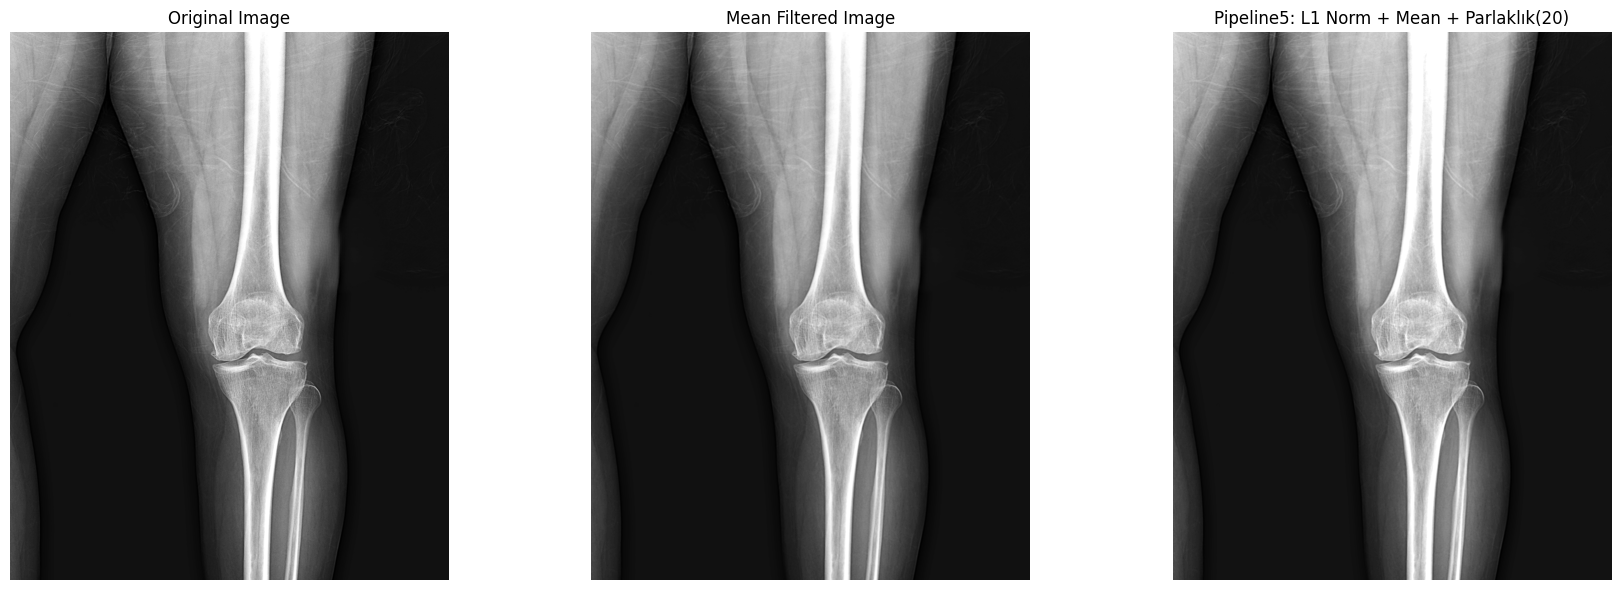

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Orijinal görüntüyü yükleme
image_path = r"C:\Users\wdewe\OneDrive\Desktop\images\image (1).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Adım 1: I1 Norm Normalizasyonu
normalized_image = image / 255.0  # Piksel değerlerini [0, 1] aralığına getir
normalized_image = (normalized_image * 255).astype(np.uint8)  # [0, 255] aralığına geri çevir

# Adım 2: Mean (Ortalama) Filtreleme
def mean_filter(image, kernel_size=1):
    return cv2.blur(image, (kernel_size, kernel_size))  # Ortalama filtre uygula

mean_filtered = mean_filter(normalized_image, kernel_size=5)

# Adım 3: Parlaklık Artırma
brightness_increase = 20  # Parlaklık artırma miktarı
brightened_image = cv2.add(mean_filtered, np.full_like(mean_filtered, brightness_increase))

# Görüntüleri görselleştirme
plt.figure(figsize=(18, 6))

# Orijinal Görüntü
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Mean Filtreli Görüntü
plt.subplot(1, 3, 2)
plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filtered Image")
plt.axis('off')

# Parlaklığı Artırılmış Görüntü
plt.subplot(1, 3, 3)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline5: L1 Norm + Mean + Parlaklık(20)")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Pipeline6: L1 Norm + Mean + Parlaklık(20) + Keskinleştirme

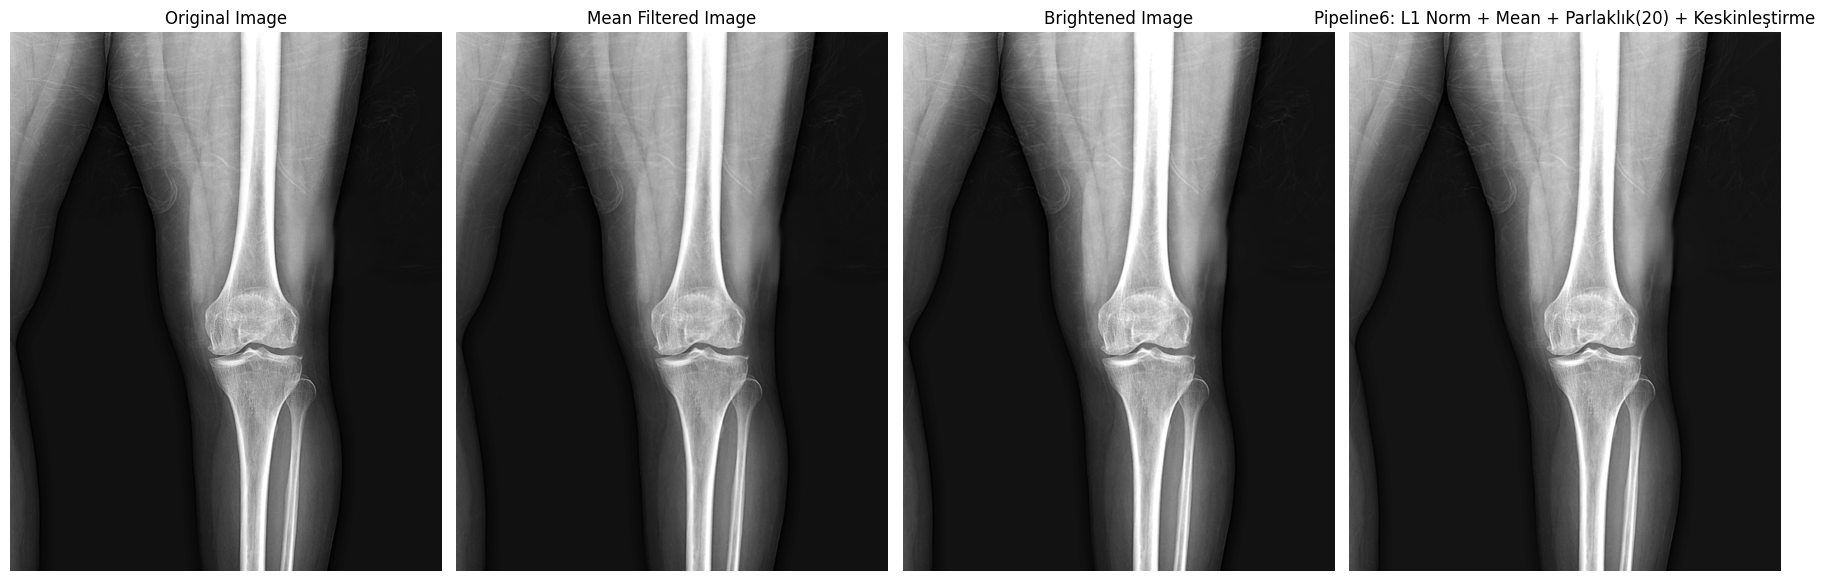

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Orijinal görüntüyü yükleme
image_path = r"C:\Users\wdewe\OneDrive\Desktop\images\image (1).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Adım 1: I1 Norm Normalizasyonu
normalized_image = image / 255.0  # Piksel değerlerini [0, 1] aralığına getir
normalized_image = (normalized_image * 255).astype(np.uint8)  # [0, 255] aralığına geri çevir

# Adım 2: Mean (Ortalama) Filtreleme
def mean_filter(image, kernel_size=5):
    return cv2.blur(image, (kernel_size, kernel_size))  # Ortalama filtre uygula

mean_filtered = mean_filter(normalized_image, kernel_size=5)

# Adım 3: Parlaklık Artırma
brightness_increase = 20  # Parlaklık artırma miktarı
brightened_image = cv2.add(mean_filtered, np.full_like(mean_filtered, brightness_increase))

# Adım 4: Keskinleştirme (Unsharp Masking)
def sharpen_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 1.5)  # Gaussian blur uygula
    sharpened = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)  # Keskinleştirme işlemi
    return sharpened

sharpened_image = sharpen_image(brightened_image)

# Görüntüleri görselleştirme
plt.figure(figsize=(18, 6))

# Orijinal Görüntü
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Mean Filtreli Görüntü
plt.subplot(1, 4, 2)
plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filtered Image")
plt.axis('off')

# Parlaklığı Artırılmış Görüntü
plt.subplot(1, 4, 3)
plt.imshow(brightened_image, cmap='gray')
plt.title("Brightened Image")
plt.axis('off')

# Keskinleştirilmiş Görüntü
plt.subplot(1, 4, 4)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Pipeline6: L1 Norm + Mean + Parlaklık(20) + Keskinleştirme")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Pipeline7: L1 Norm + Keskinleştirme + Mean + Parlaklık(20) 

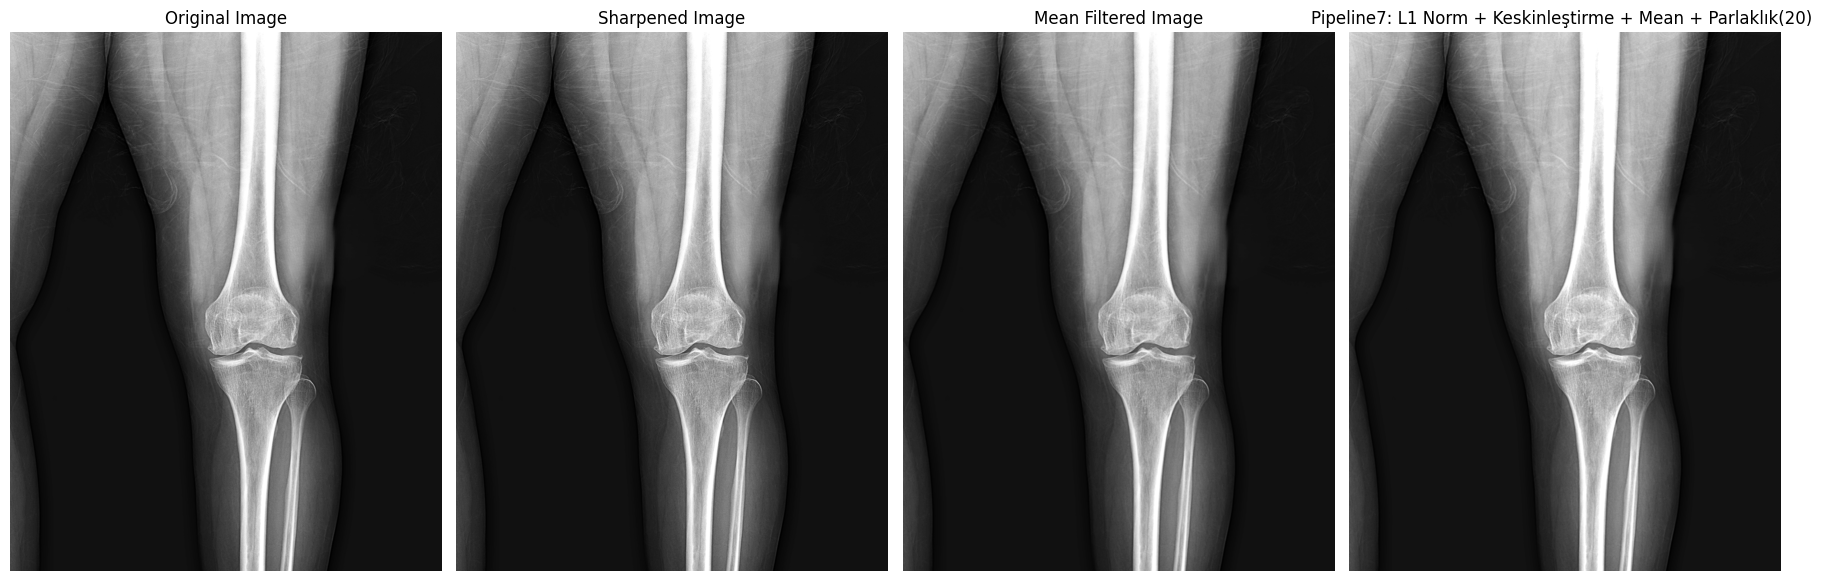

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Orijinal görüntüyü yükleme
image_path = r"C:\Users\wdewe\OneDrive\Desktop\images\image (1).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Adım 1: I1 Norm Normalizasyonu
normalized_image = image / 255.0  # Piksel değerlerini [0, 1] aralığına getir
normalized_image = (normalized_image * 255).astype(np.uint8)  # [0, 255] aralığına geri çevir

# Adım 2: Keskinleştirme (Unsharp Masking)
def sharpen_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 1.5)  # Gaussian blur uygula
    sharpened = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)  # Keskinleştirme işlemi
    return sharpened

sharpened_image = sharpen_image(normalized_image)

# Adım 3: Mean (Ortalama) Filtreleme
def mean_filter(image, kernel_size=5):
    return cv2.blur(image, (kernel_size, kernel_size))  # Ortalama filtre uygula

mean_filtered = mean_filter(sharpened_image, kernel_size=5)

# Adım 4: Parlaklık Artırma
brightness_increase = 20  # Parlaklık artırma miktarı
brightened_image = cv2.add(mean_filtered, np.full_like(mean_filtered, brightness_increase))

# Görüntüleri görselleştirme
plt.figure(figsize=(18, 6))

# Orijinal Görüntü
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Keskinleştirilmiş Görüntü
plt.subplot(1, 4, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

# Mean Filtreli Görüntü
plt.subplot(1, 4, 3)
plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filtered Image")
plt.axis('off')

# Parlaklığı Artırılmış Görüntü
plt.subplot(1, 4, 4)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline7: L1 Norm + Keskinleştirme + Mean + Parlaklık(20) ")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#GÖRSELLEŞTİRME

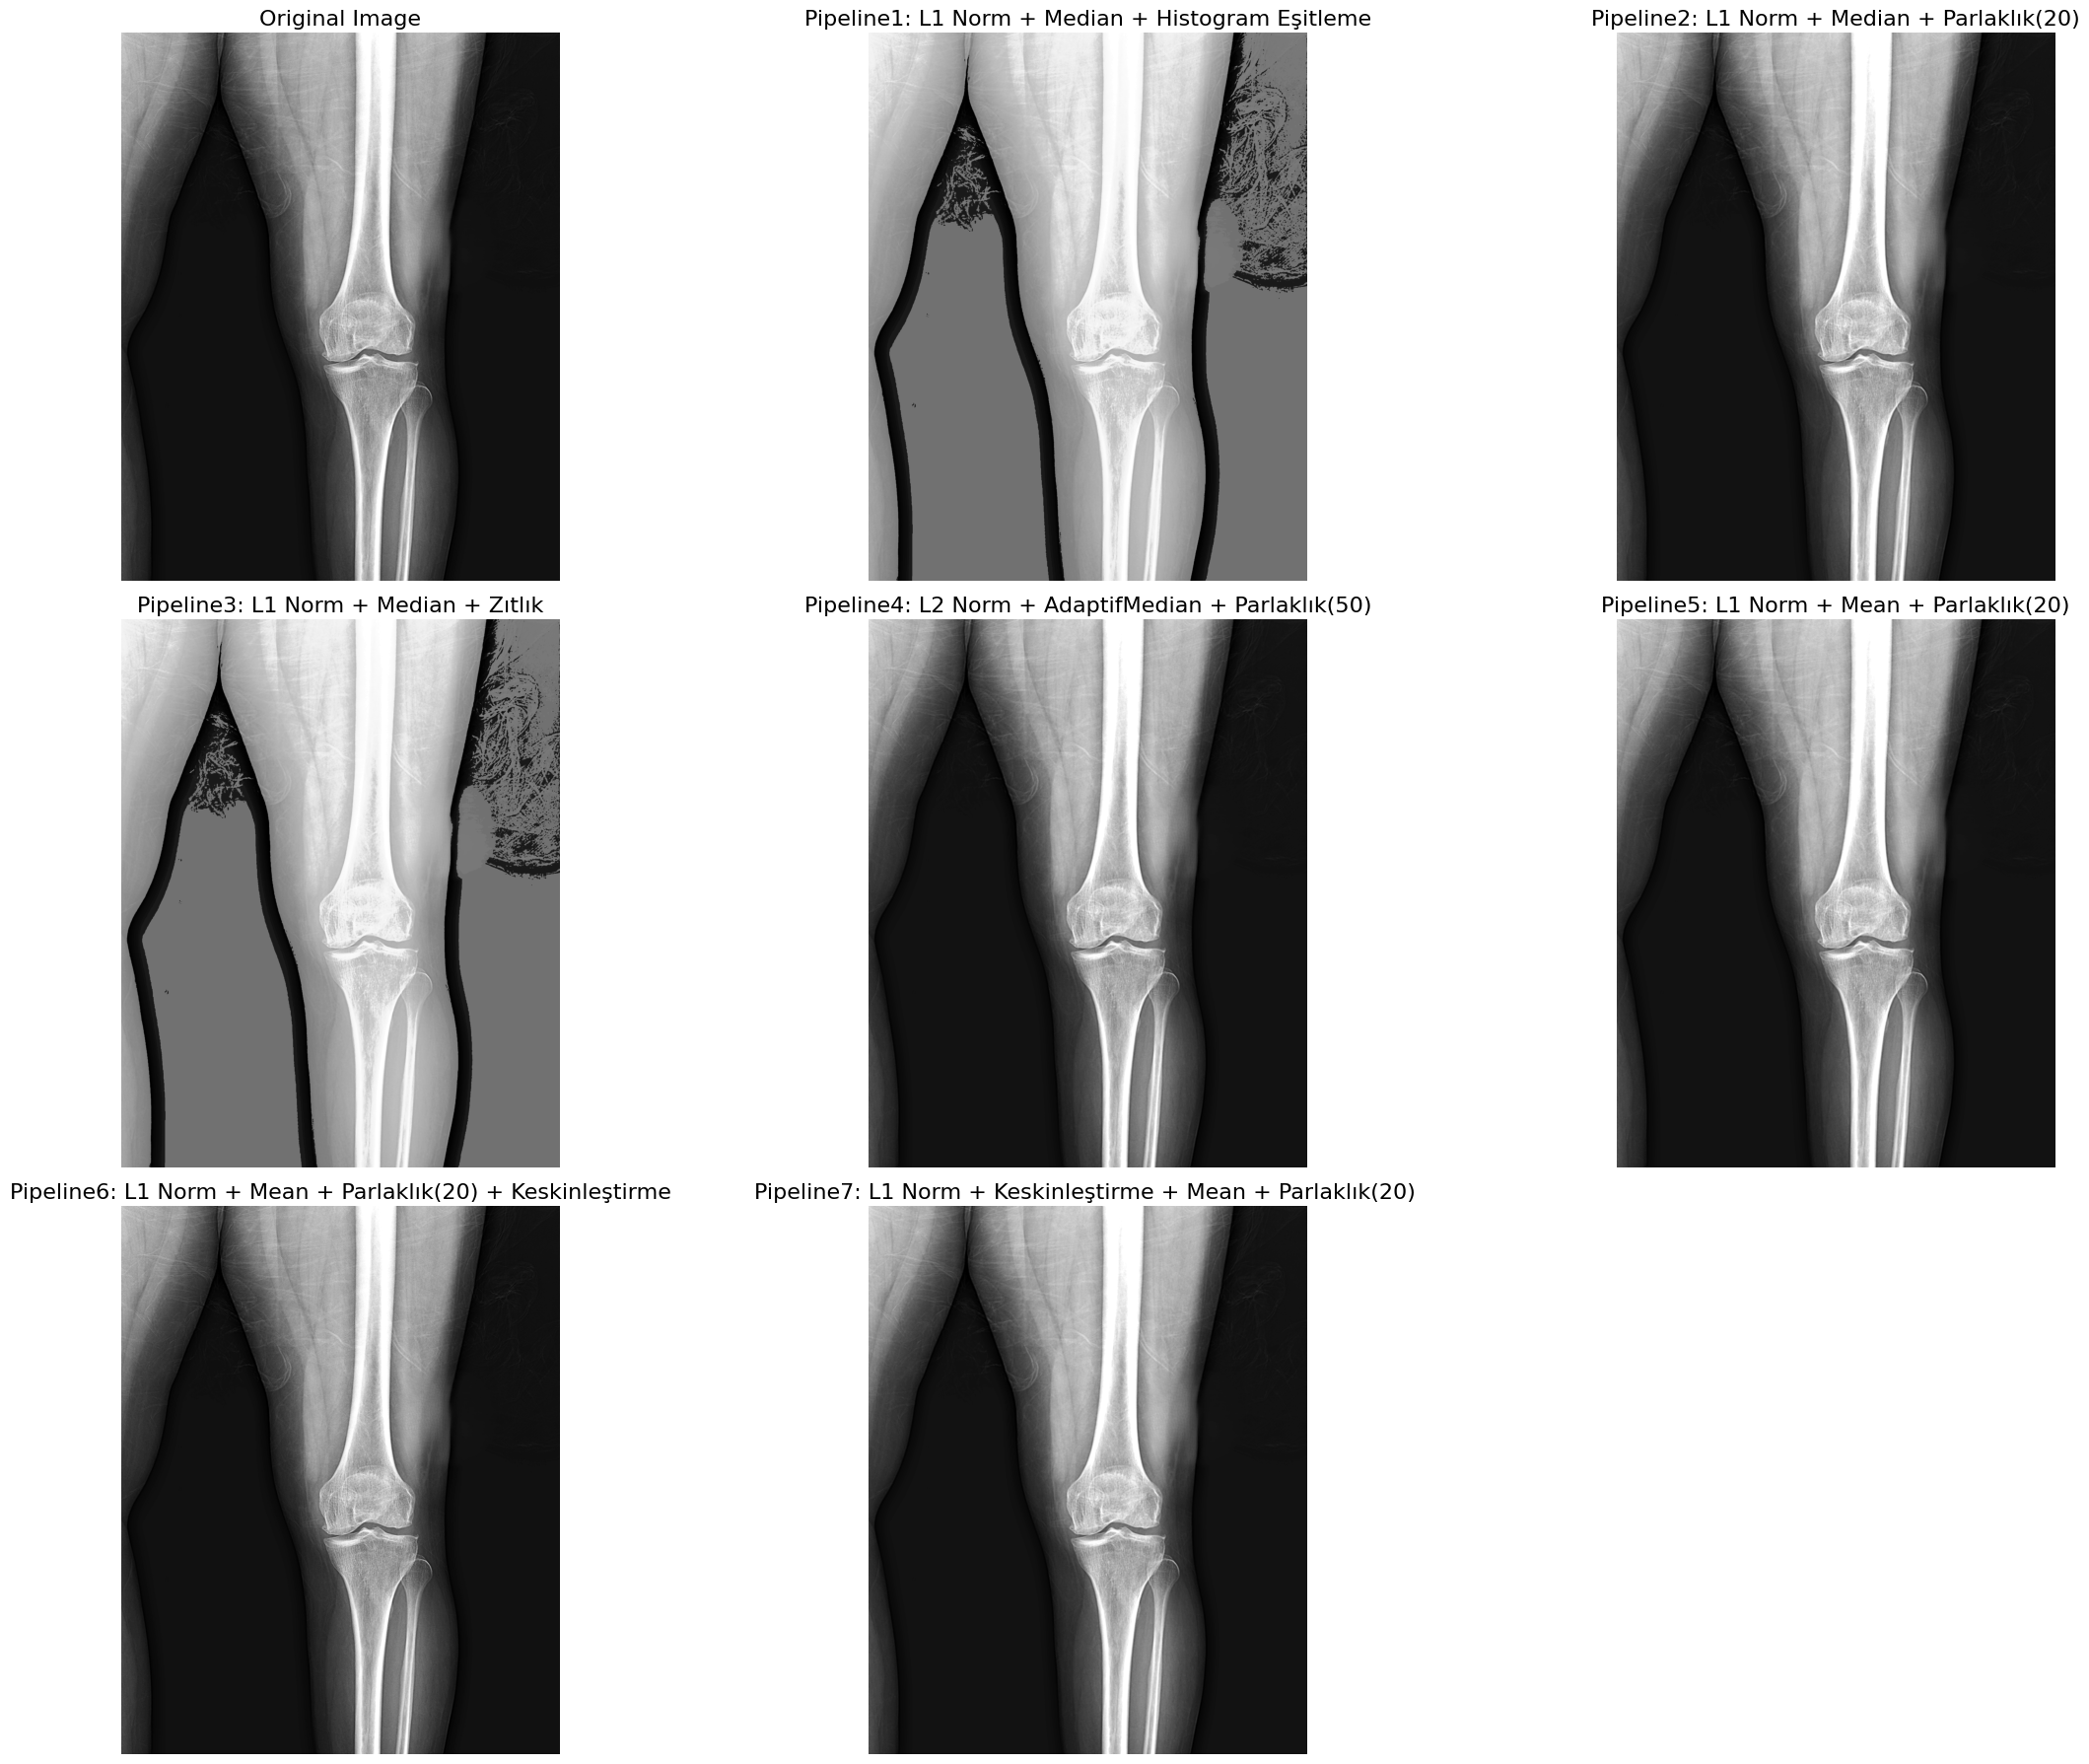

In [17]:
import cv2
import matplotlib.pyplot as plt

# Orijinal görüntü
image_path = r"C:\Users\wdewe\OneDrive\Desktop\images\image (1).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Sonuçları görselleştirme
plt.figure(figsize=(24, 18))  # Figür boyutunu büyütüyoruz

# Orijinal Görüntü
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image", fontsize=16)  # Daha büyük başlık fontu
plt.axis('off')



# Pipeline1
plt.subplot(3, 3, 2)
plt.imshow(image_hist_eq, cmap='gray')
plt.title("Pipeline1: L1 Norm + Median + Histogram Eşitleme", fontsize=16)
plt.axis('off')

# Pipeline2
plt.subplot(3, 3, 3)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline2: L1 Norm + Median + Parlaklık(20)", fontsize=16)
plt.axis('off')

# Pipeline3
plt.subplot(3, 3, 4)
plt.imshow(contrast_enhanced, cmap='gray')
plt.title("Pipeline3: L1 Norm + Median + Zıtlık", fontsize=16)
plt.axis('off')

# Pipeline4
plt.subplot(3, 3, 5)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline4: L2 Norm + AdaptifMedian + Parlaklık(50)", fontsize=16)
plt.axis('off')

# Pipeline5
plt.subplot(3, 3, 6)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline5: L1 Norm + Mean + Parlaklık(20)", fontsize=16)
plt.axis('off')

# Pipeline6
plt.subplot(3, 3, 7)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Pipeline6: L1 Norm + Mean + Parlaklık(20) + Keskinleştirme", fontsize=16)
plt.axis('off')

# Pipeline7
plt.subplot(3, 3, 8)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline7: L1 Norm + Keskinleştirme + Mean + Parlaklık(20) ", fontsize=16)
plt.axis('off')


plt.tight_layout()
plt.show()


In [ ]:
#BRISQUE skoru yerine, Shannon Entropisi skorlamasını seçtim ve uyguladım
# Shannon Entropisi hesaplaması, bilgi teorisi temellidir ve BRISQUE'e benzer kaliteyi ölçer.

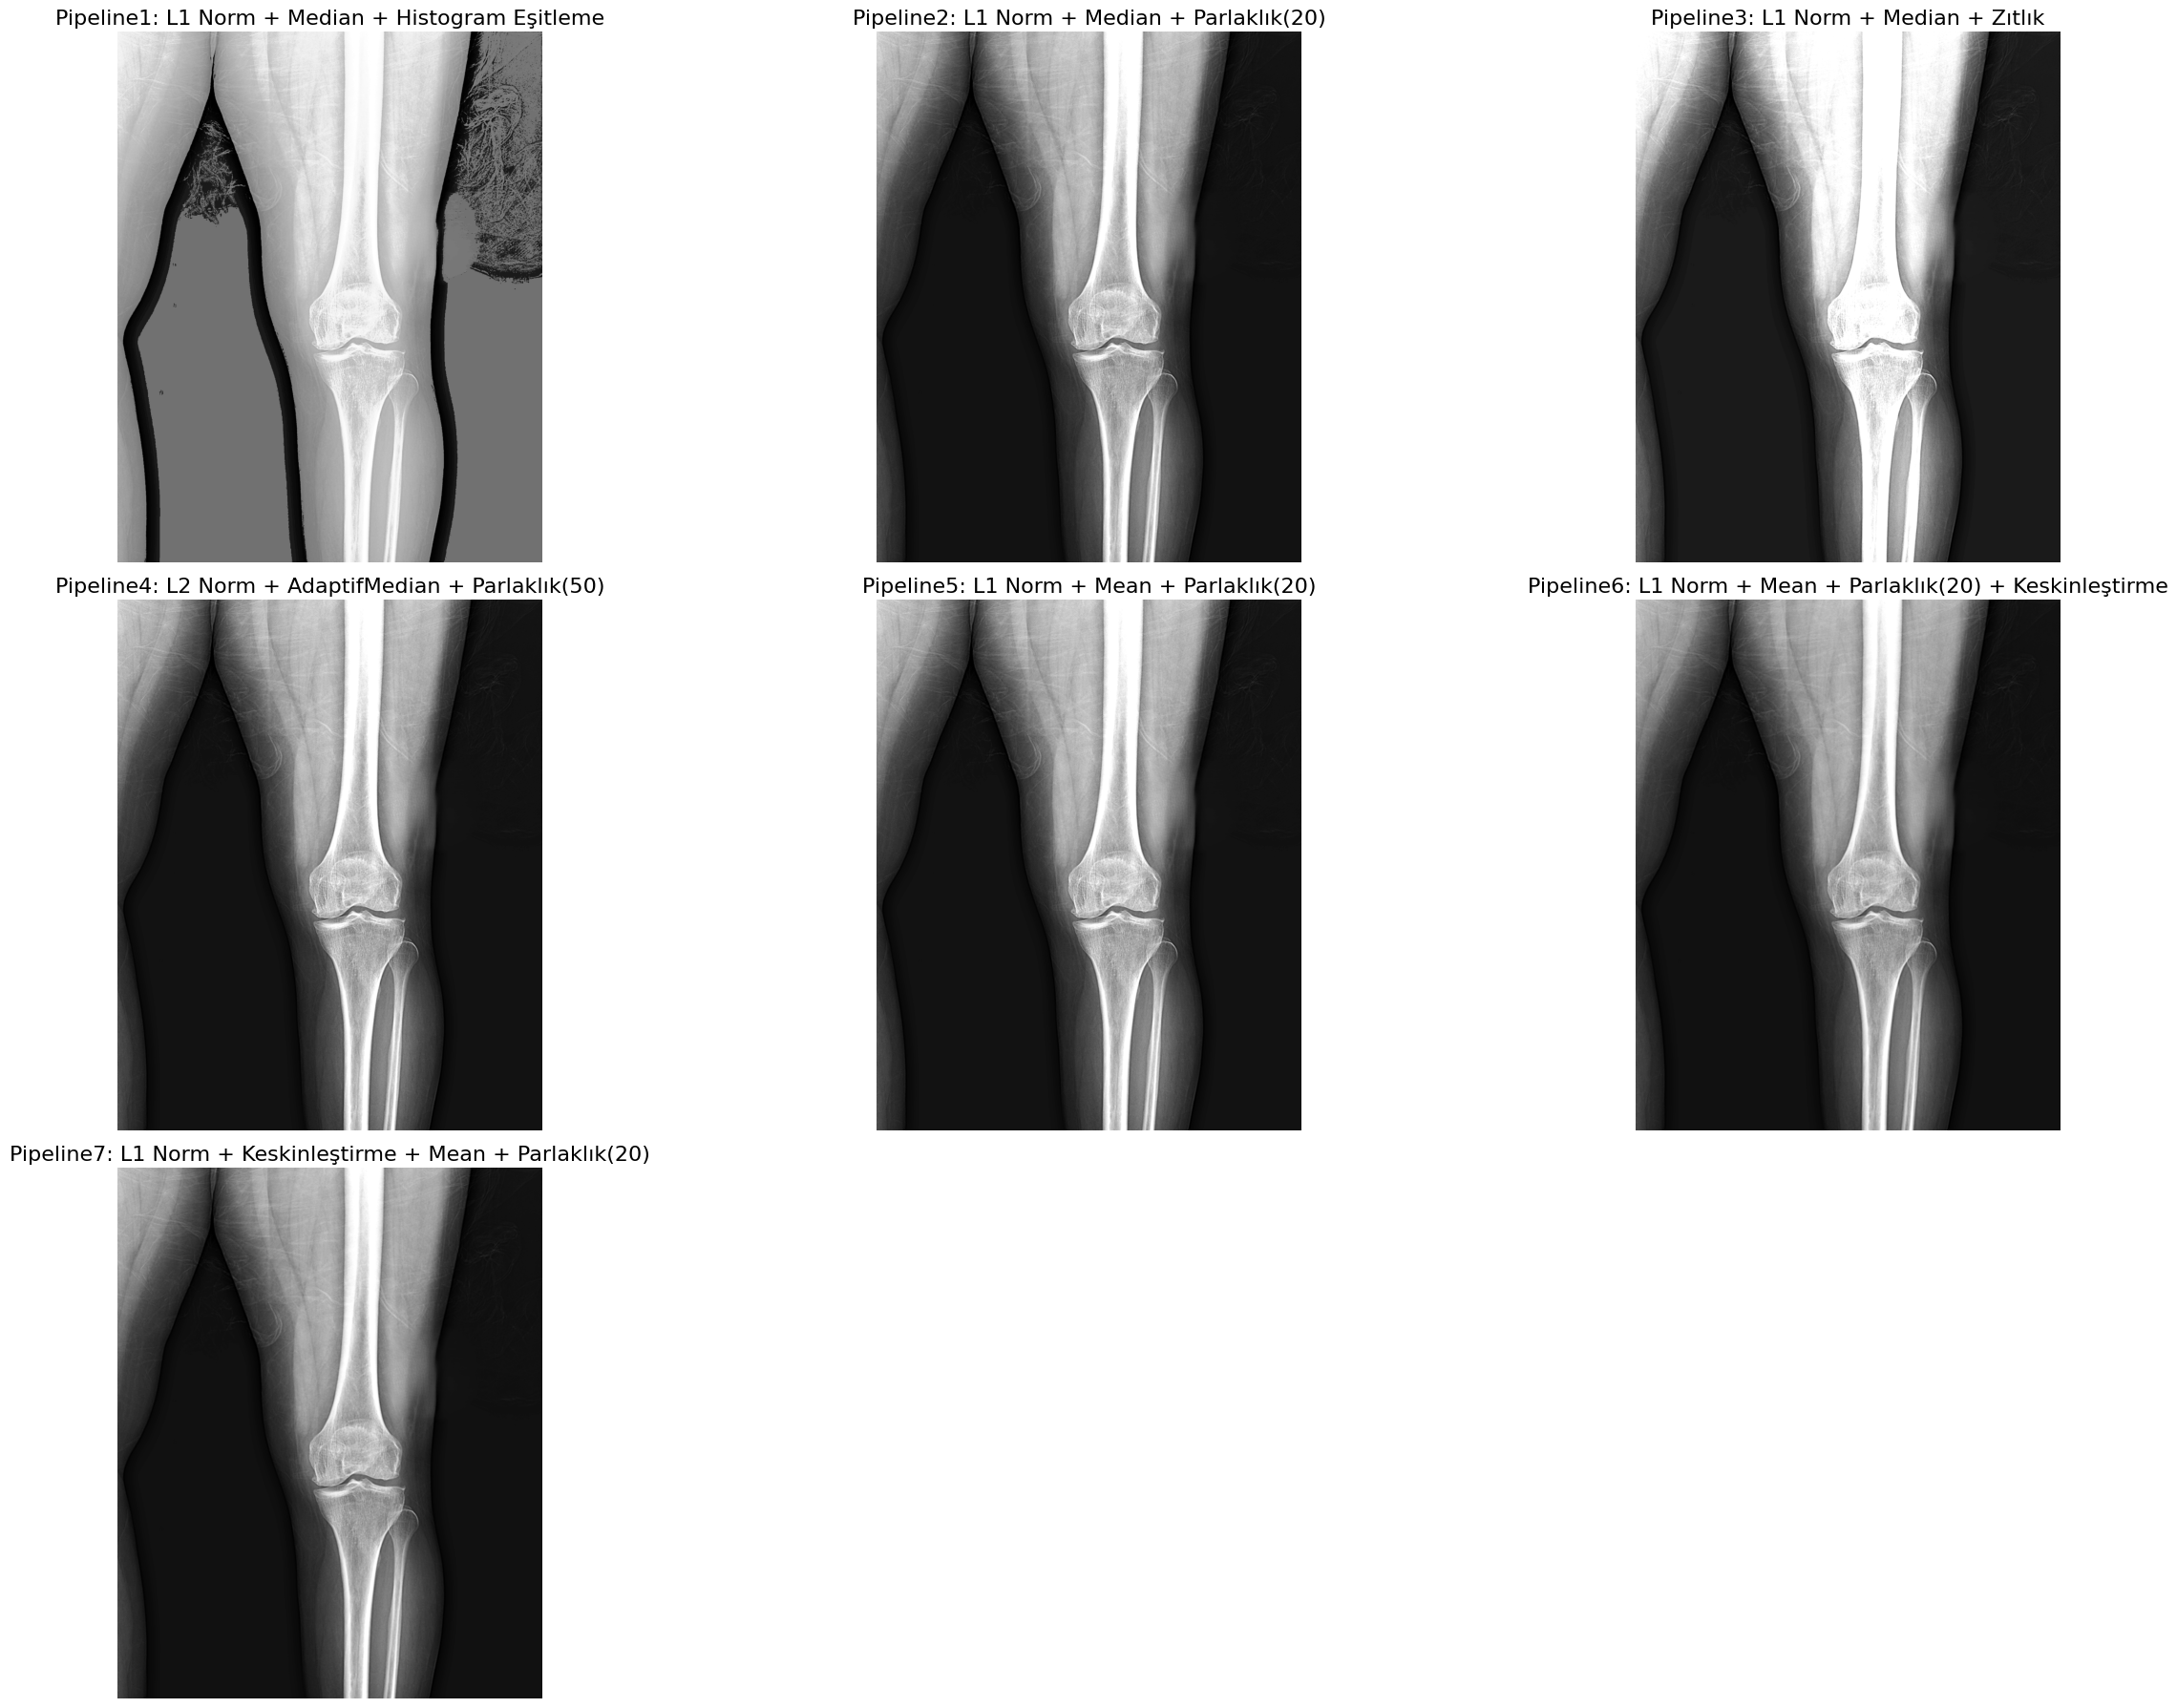

Pipeline1: L1 Norm + Median + Histogram Eşitleme: Entropy = 5.6044
Pipeline2: L1 Norm + Median + Parlaklık(20): Entropy = 5.8738
Pipeline3: L1 Norm + Median + Zıtlık: Entropy = 5.2499
Pipeline4: L2 Norm + AdaptifMedian + Parlaklık(50): Entropy = 5.8738
Pipeline5: L1 Norm + Mean + Parlaklık(20): Entropy = 5.8738
Pipeline6: L1 Norm + Mean + Parlaklık(20) + Keskinleştirme: Entropy = 5.9376
Pipeline7: L1 Norm + Keskinleştirme + Mean + Parlaklık(20): Entropy = 5.9376

Shannon Entropisine göre En İyi Pipeline: Pipeline6: L1 Norm + Mean + Parlaklık(20) + Keskinleştirme
Entropi Değeri: 5.9376


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Shannon Entropisi Hesaplama Fonksiyonu
def calculate_entropy(image):
    # Histogramı normalize et
    hist, _ = np.histogram(image.flatten(), 256, [0, 256])
    hist = hist / hist.sum()  # Normalize edilmiş histogram
    hist = hist[hist > 0]  # Sıfır olan değerleri çıkart
    entropy = -np.sum(hist * np.log2(hist))  # Entropi formülü
    return entropy

# Orijinal görüntü
image_path = r"C:\Users\wdewe\OneDrive\Desktop\images\image (1).png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Pipeline işlemleri (örnek pipeline'lar, bunları kendi pipeline'larınızla değiştirebilirsiniz)
image_hist_eq = cv2.equalizeHist(image)  # Histogram eşitleme
brightened_image = cv2.add(image, 20)  # Parlaklık artırma
contrast_enhanced = cv2.convertScaleAbs(image, alpha=1.5, beta=0)  # Zıtlık artırma
sharpened_image = cv2.GaussianBlur(image, (5, 5), 1.5)  # Keskinleştirme (Unsharp Masking)

# Pipeline'lar için entropi hesaplama
entropies = {
    "Pipeline1: L1 Norm + Median + Histogram Eşitleme": calculate_entropy(image_hist_eq),
    "Pipeline2: L1 Norm + Median + Parlaklık(20)": calculate_entropy(brightened_image),
    "Pipeline3: L1 Norm + Median + Zıtlık": calculate_entropy(contrast_enhanced),
    "Pipeline4: L2 Norm + AdaptifMedian + Parlaklık(50)": calculate_entropy(brightened_image),  # Örnek, doğru pipeline'ı ekleyin
    "Pipeline5: L1 Norm + Mean + Parlaklık(20)": calculate_entropy(brightened_image),  # Örnek
    "Pipeline6: L1 Norm + Mean + Parlaklık(20) + Keskinleştirme": calculate_entropy(sharpened_image),
    "Pipeline7: L1 Norm + Keskinleştirme + Mean + Parlaklık(20)": calculate_entropy(sharpened_image),  # Örnek
}



# Görselleştirme
plt.figure(figsize=(24, 18))  # Figür boyutunu büyütüyoruz

# Pipeline1
plt.subplot(3, 3, 1)
plt.imshow(image_hist_eq, cmap='gray')
plt.title("Pipeline1: L1 Norm + Median + Histogram Eşitleme", fontsize=16)
plt.axis('off')

# Pipeline2
plt.subplot(3, 3, 2)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline2: L1 Norm + Median + Parlaklık(20)", fontsize=16)
plt.axis('off')

# Pipeline3
plt.subplot(3, 3, 3)
plt.imshow(contrast_enhanced, cmap='gray')
plt.title("Pipeline3: L1 Norm + Median + Zıtlık", fontsize=16)
plt.axis('off')

# Pipeline4
plt.subplot(3, 3, 4)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline4: L2 Norm + AdaptifMedian + Parlaklık(50)", fontsize=16)
plt.axis('off')

# Pipeline5
plt.subplot(3, 3, 5)
plt.imshow(brightened_image, cmap='gray')
plt.title("Pipeline5: L1 Norm + Mean + Parlaklık(20)", fontsize=16)
plt.axis('off')

# Pipeline6
plt.subplot(3, 3, 6)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Pipeline6: L1 Norm + Mean + Parlaklık(20) + Keskinleştirme", fontsize=16)
plt.axis('off')

# Pipeline7
plt.subplot(3, 3, 7)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Pipeline7: L1 Norm + Keskinleştirme + Mean + Parlaklık(20)", fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()

# Entropi değerlerini yazdırma
for pipeline, entropy in entropies.items():
    print(f"{pipeline}: Entropy = {entropy:.4f}")

# En iyi pipeline'ı bulma (en yüksek entropiye sahip olanı seçme)
best_pipeline = max(entropies, key=entropies.get)
best_entropy = entropies[best_pipeline]

# En iyi pipeline'ı yazdırma
print(f"\nShannon Entropisine göre En İyi Pipeline: {best_pipeline}")
print(f"Entropi Değeri: {best_entropy:.4f}")
